In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import optimizers
from keras.layers.advanced_activations import PReLU
from keras.layers.advanced_activations import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from pandas import DataFrame
from pandas import concat
from numpy import concatenate
from keras.regularizers import l2
from keras.layers import Activation
from sklearn import metrics
from sklearn.metrics import r2_score
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from sklearn.utils import shuffle 
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [20]:
df = pd.read_csv("airquality.csv",encoding='utf-8')
df

/home/gh555657/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
0,1,二林,彰化縣,88.0,細懸浮微粒,普通,4.2,0.3,0.3,46,...,103.0,37.0,8.4,9.7,1.4,2.3,293.0,2017/1/7 13:00,81.0,31.0
1,2,三重,新北市,52.0,懸浮微粒,普通,5.7,1.98,1.8,-,...,79.0,18.0,50.0,125.0,75.0,NaN,NaN,2017/1/7 13:00,56.0,14.0
2,3,三義,苗栗縣,78.0,細懸浮微粒,普通,3.3,0.32,0.4,34,...,64.0,36.0,11.0,16.0,4.8,3.3,193.0,2017/1/7 13:00,53.0,26.0
3,4,土城,新北市,81.0,細懸浮微粒,普通,3.7,0.46,0.7,51,...,60.0,42.0,17.0,21.0,4.0,2.0,201.0,2017/1/7 13:00,44.0,28.0
4,5,士林,臺北市,40.0,NaN,良好,3.7,0.43,0.4,45,...,25.0,22.0,16.0,20.0,4.2,1.8,289.0,2017/1/7 13:00,20.0,12.0
5,6,大同,臺北市,43.0,NaN,良好,3.6,1.23,1.3,-,...,55.0,23.0,37.0,55.0,18.0,NaN,NaN,2017/1/7 13:00,37.0,13.0
6,8,大園,桃園市,68.0,細懸浮微粒,普通,9.6,0.38,0.5,30,...,54.0,23.0,21.0,24.0,3.6,2.0,295.0,2017/1/7 13:00,59.0,23.0
7,9,大寮,高雄市,134.0,細懸浮微粒,對敏感族群不良,7.4,0.37,0.5,43,...,47.0,26.0,21.0,26.0,5.6,2.6,287.0,2017/1/7 13:00,83.0,48.0
8,10,小港,高雄市,154.0,細懸浮微粒,對所有族群不良,18.0,0.42,0.6,33,...,69.0,52.0,40.0,49.0,9.0,2.6,273.0,2017/1/7 13:00,92.0,61.0
9,11,中山,臺北市,50.0,NaN,良好,3.8,0.89,0.8,34,...,42.0,23.0,34.0,46.0,12.0,1.6,5.7,2017/1/7 13:00,26.0,15.0


In [21]:
Shalu = df['SiteName'].isin(['沙鹿']) #找沙鹿測站
df[Shalu]

,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
14011,15002,沙鹿,臺中市,103.0,細懸浮微粒,對敏感族群不良,1.6,0.73,0.8,8.7,...,42.0,19.0,27.0,29.0,1.9,0.8,173.0,2017/1/8 02:00,83.0,36.0
14087,15078,沙鹿,臺中市,93.0,細懸浮微粒,普通,1.6,0.52,0.8,12,...,38.0,21.0,21.0,23.0,1.5,0.7,60.0,2017/1/8 03:00,73.0,33.0
14163,15154,沙鹿,臺中市,83.0,細懸浮微粒,普通,1.4,0.38,0.8,21,...,32.0,17.0,11.0,13.0,1.7,1.2,42.0,2017/1/8 04:00,63.0,28.0
14239,15230,沙鹿,臺中市,75.0,細懸浮微粒,普通,1.1,0.26,0.7,23,...,27.0,10.0,10.0,11.0,1.3,1.2,96.0,2017/1/8 05:00,56.0,25.0
14315,15306,沙鹿,臺中市,69.0,細懸浮微粒,普通,1.0,0.26,0.6,23,...,31.0,10.0,11.0,13.0,1.6,1.7,332.0,2017/1/8 06:00,52.0,23.0
14391,15382,沙鹿,臺中市,66.0,細懸浮微粒,普通,0.6,0.53,0.6,3.4,...,38.0,17.0,19.0,25.0,5.4,1.7,343.0,2017/1/8 07:00,50.0,22.0
14467,15458,沙鹿,臺中市,64.0,細懸浮微粒,普通,0.8,0.49,0.5,4.5,...,43.0,18.0,18.0,26.0,7.9,1.7,345.0,2017/1/8 08:00,48.0,21.0
14543,15534,沙鹿,臺中市,66.0,細懸浮微粒,普通,1.8,0.48,0.5,11,...,56.0,24.0,15.0,25.0,9.5,4.8,12.0,2017/1/8 09:00,50.0,21.0
14619,15610,沙鹿,臺中市,70.0,細懸浮微粒,普通,2.5,0.33,0.4,20,...,65.0,30.0,13.0,19.0,5.1,4.2,14.0,2017/1/8 10:00,52.0,23.0
14695,15686,沙鹿,臺中市,72.0,細懸浮微粒,普通,2.1,0.31,0.4,30,...,60.0,29.0,11.0,15.0,3.5,5.4,337.0,2017/1/8 11:00,53.0,24.0


In [22]:
Shalu = df['SiteName'].isin(['沙鹿']) #找沙鹿測站
Shalu=df[Shalu].fillna(method='ffill').drop(columns=['SiteName','AQI','id','Country','Pollutant','Status','CO_8hr','O3_8hr','NOx','WindSpeed','WindDirec','PublishTime','PM10_AVG','PM25_AVG','NO']).reset_index(drop=True)
#只留下SiteName PM25 column

Shalu

,SO2,CO,O3,PM10,PM25,NO2
0,1.6,0.73,8.7,42.0,19.0,27.0
1,1.6,0.52,12,38.0,21.0,21.0
2,1.4,0.38,21,32.0,17.0,11.0
3,1.1,0.26,23,27.0,10.0,10.0
4,1.0,0.26,23,31.0,10.0,11.0
5,0.6,0.53,3.4,38.0,17.0,19.0
6,0.8,0.49,4.5,43.0,18.0,18.0
7,1.8,0.48,11,56.0,24.0,15.0
8,2.5,0.33,20,65.0,30.0,13.0
9,2.1,0.31,30,60.0,29.0,11.0


In [23]:
bbb=Shalu['PM10']>50
#Shalu['PM10']=Shalu['PM10'].astype("int")
#Shalu['PM10']=Shalu['PM10'].apply(lambda x: [y if y <= 200 else np.nan for y in x])
Shalu['PM10'].replace(2,np.nan, inplace=True)


In [24]:
Shalu[bbb]

,SO2,CO,O3,PM10,PM25,NO2
7,1.8,0.48,11,56.0,24.0,15.0
8,2.5,0.33,20,65.0,30.0,13.0
9,2.1,0.31,30,60.0,29.0,11.0
10,1.1,0.31,37,53.0,29.0,10.0
11,0.9,0.33,44,54.0,25.0,10.0
12,0.6,0.44,49,61.0,23.0,10.0
13,0.6,0.52,51,62.0,23.0,13.0
14,0.6,0.56,47,66.0,23.0,17.0
15,0.3,0.57,35,63.0,23.0,16.0
16,0.6,0.62,22,53.0,18.0,20.0


In [25]:
Shalu.replace({0:np.nan,0.0:np.nan}, inplace=True) #將0全部改為空值
 
Shalu

,SO2,CO,O3,PM10,PM25,NO2
0,1.6,0.73,8.7,42.0,19.0,27.0
1,1.6,0.52,12.0,38.0,21.0,21.0
2,1.4,0.38,21.0,32.0,17.0,11.0
3,1.1,0.26,23.0,27.0,10.0,10.0
4,1.0,0.26,23.0,31.0,10.0,11.0
5,0.6,0.53,3.4,38.0,17.0,19.0
6,0.8,0.49,4.5,43.0,18.0,18.0
7,1.8,0.48,11.0,56.0,24.0,15.0
8,2.5,0.33,20.0,65.0,30.0,13.0
9,2.1,0.31,30.0,60.0,29.0,11.0


In [26]:
aaa=Shalu['PM10']>200
Shalu[aaa]

,SO2,CO,O3,PM10,PM25,NO2
4088,0.9,0.10,23.0,247.0,4.0,3.8
4363,3.6,0.23,23.0,253.0,15.0,11.0
4364,3.3,0.39,12.0,253.0,10.0,16.0
7504,1.6,0.47,23.0,209.0,112.0,23.0


In [27]:
Shalu.fillna(method='ffill', inplace=True) #以前面數字來取代0值

Shalu

,SO2,CO,O3,PM10,PM25,NO2
0,1.6,0.73,8.7,42.0,19.0,27.0
1,1.6,0.52,12.0,38.0,21.0,21.0
2,1.4,0.38,21.0,32.0,17.0,11.0
3,1.1,0.26,23.0,27.0,10.0,10.0
4,1.0,0.26,23.0,31.0,10.0,11.0
5,0.6,0.53,3.4,38.0,17.0,19.0
6,0.8,0.49,4.5,43.0,18.0,18.0
7,1.8,0.48,11.0,56.0,24.0,15.0
8,2.5,0.33,20.0,65.0,30.0,13.0
9,2.1,0.31,30.0,60.0,29.0,11.0


In [28]:
Shalu['pr']=''
#Shalu.drop([ 0,1],inplace=True)
#Shalu.reset_index(drop=True,inplace=True)


Shalu.to_csv('Shalupollution.csv')

Shalu

,SO2,CO,O3,PM10,PM25,NO2,pr
0,1.6,0.73,8.7,42.0,19.0,27.0,
1,1.6,0.52,12.0,38.0,21.0,21.0,
2,1.4,0.38,21.0,32.0,17.0,11.0,
3,1.1,0.26,23.0,27.0,10.0,10.0,
4,1.0,0.26,23.0,31.0,10.0,11.0,
5,0.6,0.53,3.4,38.0,17.0,19.0,
6,0.8,0.49,4.5,43.0,18.0,18.0,
7,1.8,0.48,11.0,56.0,24.0,15.0,
8,2.5,0.33,20.0,65.0,30.0,13.0,
9,2.1,0.31,30.0,60.0,29.0,11.0,


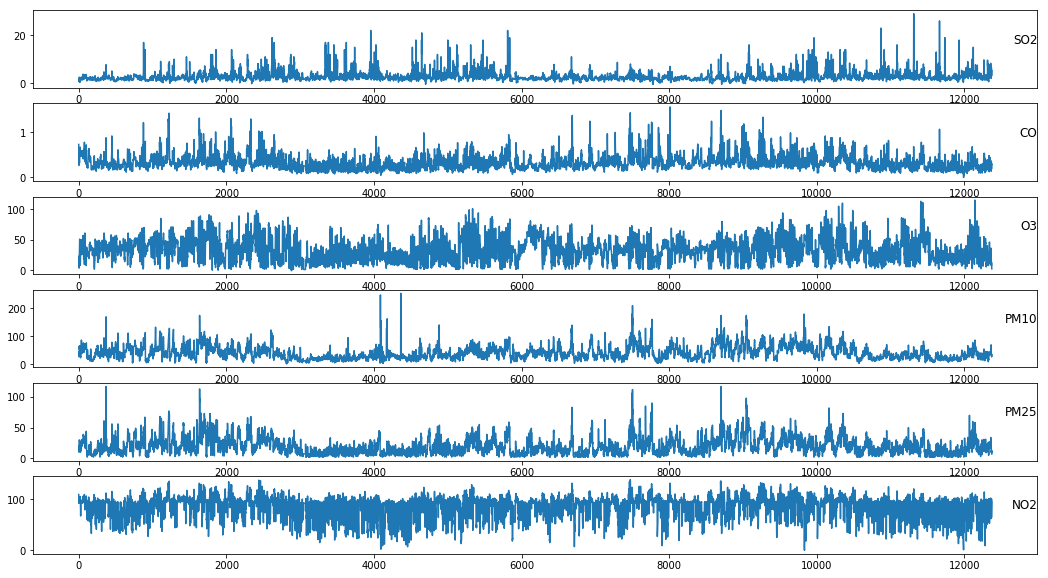

In [29]:
# load dataset
dataset =pd.read_csv('Shalupollution.csv',header=0,index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,5] = encoder.fit_transform(values[:,5])
# ensure all data is float
values = values.astype('float32')
# specify columns to plot
groups = [0, 1,2, 3, 4,5]
i=1
plt.figure(figsize=(18,10)) 
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[0:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [30]:
dataset

,SO2,CO,O3,PM10,PM25,NO2,pr
0,1.6,0.73,8.7,42.0,19.0,109.0,NaN
1,1.6,0.52,12.0,38.0,21.0,103.0,NaN
2,1.4,0.38,21.0,32.0,17.0,93.0,NaN
3,1.1,0.26,23.0,27.0,10.0,92.0,NaN
4,1.0,0.26,23.0,31.0,10.0,93.0,NaN
5,0.6,0.53,3.4,38.0,17.0,101.0,NaN
6,0.8,0.49,4.5,43.0,18.0,100.0,NaN
7,1.8,0.48,11.0,56.0,24.0,97.0,NaN
8,2.5,0.33,20.0,65.0,30.0,95.0,NaN
9,2.1,0.31,30.0,60.0,29.0,93.0,NaN


In [31]:
#z-score 函式 - sklearn version
from sklearn.preprocessing import StandardScaler

scale = StandardScaler() #z-scaler物件
train_set_scaled = pd.DataFrame(scale.fit_transform(dataset),
                                columns=dataset.keys())
train_set_scaled['pr']=dataset['PM25']

train_set_scaled

/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:688: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


,SO2,CO,O3,PM10,PM25,NO2,pr
0,-0.576981,2.527709,-1.280923,0.046891,-0.056876,1.114006,19.0
1,-0.576981,1.222167,-1.102152,-0.118723,0.087505,0.835318,21.0
2,-0.681972,0.351805,-0.614595,-0.367145,-0.201257,0.370840,17.0
3,-0.839458,-0.394219,-0.506249,-0.574163,-0.706589,0.324392,10.0
4,-0.891954,-0.394219,-0.506249,-0.408549,-0.706589,0.370840,10.0
5,-1.101936,1.284335,-1.568040,-0.118723,-0.201257,0.742423,17.0
6,-0.996945,1.035661,-1.508450,0.088295,-0.129066,0.695975,18.0
7,-0.471989,0.973492,-1.156325,0.626542,0.304076,0.556631,24.0
8,-0.104520,0.040962,-0.668768,0.999174,0.737217,0.463735,30.0
9,-0.314503,-0.083376,-0.127038,0.792156,0.665027,0.370840,29.0


In [32]:
def train_window(df,ref_hr=12,pr_hr=6):
    X_train,Y_train=[],[]
    for i in range(df.shape[0]-pr_hr-ref_hr): 
        X_train.append(np.array(df.iloc[i:i+ref_hr,:-1])) 
        Y_train.append(np.array(df.iloc[i+ref_hr:i+ref_hr+pr_hr]["pr"]))
#        Y_train.append(np.array(df.iloc[i+ref_day:i+ref_day]["var1(t)"]))
        #选取标签为A和C的列，并且选完类型还是dataframe df.iloc 指定行數 EX: df = df.iloc[:, [0, 2]] 
        #"，"前面的"："表示选取整列，第二个示例中的的0:2表示选取第0行到第二行，这里的0:2相当于[0,2）前闭后开，2是不在范围之内的。 
        #需要注意的是，如果是df = df.loc[0:2, ['A', 'C']]或者df = df.loc[0:2, ['A', 'C']]，切片之后类型依旧是dataframe，不能直接进行
    return np.array(X_train), np.array(Y_train) 



In [33]:
'''
#將次序打亂 資料亂序 將資料打散，而非照日期排序
def shuffle(X,Y):
    np.random.seed(10)
    randomList = np.arange(X.shape[0])
    np.random.shuffle(randomList)
    return X[randomList], Y[randomList]
    '''

'\n#將次序打亂 資料亂序 將資料打散，而非照日期排序\ndef shuffle(X,Y):\n    np.random.seed(10)\n    randomList = np.arange(X.shape[0])\n    np.random.shuffle(randomList)\n    return X[randomList], Y[randomList]\n    '

In [36]:
# Training data & Validation data
# 將Training Data取一部份當作Validation Data


def splitData(X, Y, rate):
    X_train = X[int(X.shape[0]*rate):]
    Y_train = Y[int(Y.shape[0]*rate):]
    X_val = X[:int(X.shape[0]*rate)]
    Y_val = Y[:int(Y.shape[0]*rate)]
    return X_train, Y_train, X_val, Y_val

/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  # This is added back by InteractiveShellApp.init_path()
/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(64, input_shape=(12, 6))`
  # This is added back by InteractiveShellApp.init_path()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 64)                18176     
_________________________________________________________________
activation_6 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 903       
__________

10008/10008 [==============================] - 1s 137us/step - loss: 65.1092 - val_loss: 57.1131
Epoch 63/500
10008/10008 [==============================] - 1s 139us/step - loss: 64.6496 - val_loss: 56.3706
Epoch 64/500
10008/10008 [==============================] - 1s 145us/step - loss: 64.8166 - val_loss: 57.5278
Epoch 65/500
10008/10008 [==============================] - 1s 138us/step - loss: 64.8462 - val_loss: 56.5218
Epoch 66/500
10008/10008 [==============================] - 1s 135us/step - loss: 63.5234 - val_loss: 57.1866
Epoch 67/500
10008/10008 [==============================] - 1s 135us/step - loss: 63.3624 - val_loss: 58.7499
Epoch 68/500
10008/10008 [==============================] - 1s 143us/step - loss: 63.4901 - val_loss: 58.4318
Epoch 69/500
10008/10008 [==============================] - 1s 136us/step - loss: 62.1042 - val_loss: 57.8550
Epoch 70/500
10008/10008 [==============================] - 1s 131us/step - loss: 62.9588 - val_loss: 57.6734
Epoch 71/500
10008/1000

10008/10008 [==============================] - 3s 254us/step - loss: 49.6594 - val_loss: 62.4599
Epoch 137/500
10008/10008 [==============================] - 3s 271us/step - loss: 50.0145 - val_loss: 64.2353
Epoch 138/500
10008/10008 [==============================] - 3s 259us/step - loss: 49.9647 - val_loss: 63.1982
Epoch 139/500
10008/10008 [==============================] - 3s 250us/step - loss: 49.6470 - val_loss: 64.1671
Epoch 140/500
10008/10008 [==============================] - 3s 271us/step - loss: 49.0400 - val_loss: 63.4164
Epoch 141/500
10008/10008 [==============================] - 3s 262us/step - loss: 48.8798 - val_loss: 63.6825
Epoch 142/500
10008/10008 [==============================] - 3s 264us/step - loss: 49.5019 - val_loss: 63.4678
Epoch 143/500
10008/10008 [==============================] - 2s 227us/step - loss: 49.0043 - val_loss: 63.4037
Epoch 144/500
10008/10008 [==============================] - 2s 219us/step - loss: 49.1486 - val_loss: 62.9764
Epoch 145/500
1

Epoch 210/500
10008/10008 [==============================] - 3s 263us/step - loss: 42.7236 - val_loss: 64.7409
Epoch 211/500
10008/10008 [==============================] - 3s 263us/step - loss: 43.2295 - val_loss: 65.2693
Epoch 212/500
10008/10008 [==============================] - 3s 251us/step - loss: 42.9042 - val_loss: 64.0716
Epoch 213/500
10008/10008 [==============================] - 2s 234us/step - loss: 43.0887 - val_loss: 65.4530
Epoch 214/500
10008/10008 [==============================] - 2s 248us/step - loss: 42.3627 - val_loss: 65.8349
Epoch 215/500
10008/10008 [==============================] - 2s 249us/step - loss: 42.1021 - val_loss: 64.5645
Epoch 216/500
10008/10008 [==============================] - 2s 242us/step - loss: 42.8508 - val_loss: 64.7807
Epoch 217/500
10008/10008 [==============================] - 3s 254us/step - loss: 42.5403 - val_loss: 64.7283
Epoch 218/500
10008/10008 [==============================] - 3s 258us/step - loss: 43.1816 - val_loss: 66.4298
E

Epoch 284/500
10008/10008 [==============================] - 2s 241us/step - loss: 39.4503 - val_loss: 67.6461
Epoch 285/500
10008/10008 [==============================] - 2s 218us/step - loss: 39.6729 - val_loss: 66.8223
Epoch 286/500
10008/10008 [==============================] - 2s 249us/step - loss: 39.6046 - val_loss: 65.8696
Epoch 287/500
10008/10008 [==============================] - 3s 260us/step - loss: 39.4498 - val_loss: 67.0766
Epoch 288/500
10008/10008 [==============================] - 3s 253us/step - loss: 38.6770 - val_loss: 67.1492
Epoch 289/500
10008/10008 [==============================] - 3s 259us/step - loss: 39.2964 - val_loss: 65.6721
Epoch 290/500
10008/10008 [==============================] - 3s 260us/step - loss: 39.3131 - val_loss: 68.1184
Epoch 291/500
10008/10008 [==============================] - 2s 238us/step - loss: 38.9820 - val_loss: 66.5495
Epoch 292/500
10008/10008 [==============================] - 3s 259us/step - loss: 38.8593 - val_loss: 64.3856
E

Epoch 358/500
10008/10008 [==============================] - 2s 234us/step - loss: 36.4190 - val_loss: 68.3164
Epoch 359/500
10008/10008 [==============================] - 2s 206us/step - loss: 36.4538 - val_loss: 66.6580
Epoch 360/500
10008/10008 [==============================] - 2s 190us/step - loss: 36.7072 - val_loss: 68.8335
Epoch 361/500
10008/10008 [==============================] - 2s 163us/step - loss: 36.7842 - val_loss: 68.0214
Epoch 362/500
10008/10008 [==============================] - 2s 183us/step - loss: 36.3183 - val_loss: 68.4666
Epoch 363/500
10008/10008 [==============================] - 2s 188us/step - loss: 36.8531 - val_loss: 67.2700
Epoch 364/500
10008/10008 [==============================] - 2s 190us/step - loss: 35.9743 - val_loss: 66.9899
Epoch 365/500
10008/10008 [==============================] - 2s 186us/step - loss: 37.0743 - val_loss: 70.4407
Epoch 366/500
10008/10008 [==============================] - 2s 181us/step - loss: 36.5419 - val_loss: 68.3447
E

Epoch 432/500
10008/10008 [==============================] - 1s 106us/step - loss: 35.4593 - val_loss: 68.0661
Epoch 433/500
10008/10008 [==============================] - 1s 109us/step - loss: 35.0616 - val_loss: 67.6516
Epoch 434/500
10008/10008 [==============================] - 1s 109us/step - loss: 35.0327 - val_loss: 68.2240
Epoch 435/500
10008/10008 [==============================] - 1s 111us/step - loss: 34.3027 - val_loss: 67.9356
Epoch 436/500
10008/10008 [==============================] - 1s 104us/step - loss: 34.9806 - val_loss: 68.2460
Epoch 437/500
10008/10008 [==============================] - 1s 106us/step - loss: 35.2328 - val_loss: 69.4285
Epoch 438/500
10008/10008 [==============================] - 1s 108us/step - loss: 34.6659 - val_loss: 69.1918
Epoch 439/500
10008/10008 [==============================] - 1s 112us/step - loss: 35.0549 - val_loss: 69.9218
Epoch 440/500
10008/10008 [==============================] - 1s 107us/step - loss: 34.4532 - val_loss: 67.2390
E

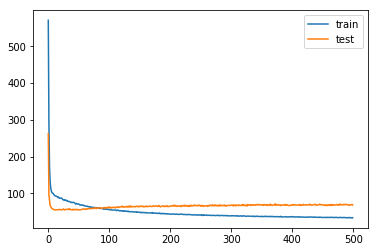

In [37]:
#model1
# build Data, use last 23 hours to predict next 1 hours
X_train,Y_train=train_window(train_set_scaled,12,7)

# split training data and validation data
X_train, Y_train, X_val, Y_val = splitData(X_train, Y_train, 0.1)


def buildManyToOneModel(shape):
    model = Sequential()
    model.add(LSTM(64,input_length=shape[1], input_dim=shape[2]))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7))
    model.add(Activation('linear'))
    model.compile(loss="mse", optimizer="adam")
    model.summary()
    return model

model = buildManyToOneModel(X_train.shape)

history=model.fit(X_train, Y_train, epochs=500, batch_size=300, validation_split= 0.1)


# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#儲存model
model.save('Shalumodel.h5')
del model

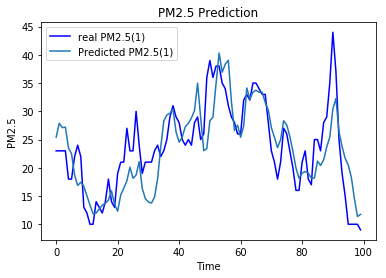

Train 0.33489208633093526
Validation 0.15546558704453442
1.847655094750246e+49
The R2 score on the Test set is:	0.289
Train Score: 5.13 RMSE
Test Score: 11.66 RMSE
The MSE   on the Test set is: 136.01855781257436
The RMSE  on the Test set is: 11.662699422199577
The MAE   on the Test set is: 8.154183857533337
The MAPE  on the Test set is: 0.044401418869129246
The SMAPE on the Test set is: 0.032672680120229725


/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


In [38]:
#讀取model3
model = load_model('Shalumodel.h5')
# 預測
trainPredict = model.predict(X_train)
testPredict = model.predict(X_val)

plt.plot(Y_val[0:100,0], color = 'blue', label = 'real PM2.5(1)')
#plt.plot(testPredict[0:10], color = 'red', label = 'Predicted PM2.5')
plt.plot(testPredict[0:100,0], label = 'Predicted PM2.5(1)')
plt.title('PM2.5 Prediction')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

print('Train',np.sum(np.abs(np.exp(trainPredict)-np.exp(Y_train))/np.exp(Y_train)<0.25)/Y_train.shape[0])

print('Validation',np.sum(np.abs(np.exp(testPredict)-np.exp(Y_val))/np.exp(Y_val)<0.25)/Y_val.shape[0])

print(np.sqrt(mean_squared_error(np.exp(Y_val),np.exp(testPredict))))

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_val, testPredict)))
r2_train = r2_score(Y_val,testPredict)
# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(Y_train, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_val, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# MAPE和SMAPE
def mape(y_true, y_pred): 
    n = len(y_true)
    return np.mean(np.abs((y_pred - y_true) / y_true))/n *100 

def smape(y_true, y_pred):
    n = len(y_true)
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))/n *100

# MSE
print("The MSE   on the Test set is:",metrics.mean_squared_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好
# RMSE
print("The RMSE  on the Test set is:",np.sqrt(metrics.mean_squared_error(Y_val, testPredict))) # 範圍(0,+∞) 越小越好
# MAE
print("The MAE   on the Test set is:",metrics.mean_absolute_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# MAPE
print("The MAPE  on the Test set is:",mape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# SMAPE
print("The SMAPE on the Test set is:",smape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用

